In [4]:
import pandas as pd
import numpy as np

In [5]:
df_players=pd.read_csv('players_22.csv')

C:\Users\Sumaila Ayamba\AppData\Local\Temp\ipykernel_14216\2539797549.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_players=pd.read_csv('players_22.csv')


In [6]:
#Look at top most of the data 
df_players.head(5)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [10]:
#Select Feature that would be used to cluster the players

my_features=['overall', 'potential', 'wage_eur', "value_eur", "age"]


In [11]:
#Dropping nulls in my_features

df_players=df_players.dropna(subset=my_features)


In [12]:
copy_df=df_players.copy()

In [13]:
#Making a copy of the data

my_data=df_players[my_features].copy()



In [14]:
my_data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [ ]:
#Data scaling

#1. Scale the data
#2. initialize random centroids
#3. Label each data point
# Repeat steps 3 and 4 unitl centroids stop changing



In [15]:
my_data=((my_data - my_data.min()) / (my_data.max() - my_data.min())) * 9 + 1




In [16]:
my_data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [17]:
my_data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [22]:

def random_centroids(my_data, i):
    centroids=[]
    for i in range(i):
        centroid=my_data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
        
    return pd.concat(centroids, axis=1)

   

In [23]:
centroids=random_centroids(my_data, 5)


C:\Users\Sumaila Ayamba\AppData\Local\Temp\ipykernel_14216\2058374249.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=my_data.apply(lambda x: float(x.sample()))


In [24]:
centroids

,0,1,2,3,4
overall,4.326087,7.065217,5.108696,4.326087,5.108696
potential,5.304348,4.521739,3.739130,5.108696,4.326087
wage_eur,1.012876,1.193133,1.038627,1.167382,1.012876
value_eur,1.064534,1.370734,1.042497,1.018140,1.022779
age,5.333333,3.000000,3.000000,2.333333,5.666667


In [28]:
def get_labels(my_data, centroids):

    my_distances=centroids.apply(lambda x: np.sqrt(((my_data - x) ** 2).sum(axis= 1)))

    return my_distances.idxmin(axis=1)

In [29]:
my_distances

,0,1,2,3,4
0,11.558863,11.206576,12.418542,12.334798,11.576525
1,11.220399,10.715268,11.968461,11.871700,11.262089
2,10.036822,9.937902,11.128708,11.107674,10.021028
3,11.235947,10.535423,11.774537,11.629735,11.305340
4,12.539777,11.954369,13.079814,12.945987,12.592634
...,...,...,...,...,...
19234,5.507277,6.750382,4.638477,4.892244,5.612105
19235,5.262129,6.356733,4.300788,3.979198,5.674683
19236,5.289366,6.525480,4.409689,4.451418,5.523925
19237,5.177795,6.311407,4.269522,3.876873,5.630665


In [30]:
labels=get_labels(my_data, centroids)

In [31]:
labels

0        1
1        1
2        1
3        1
4        1
        ..
19234    2
19235    3
19236    2
19237    3
19238    3
Length: 19165, dtype: int64

In [32]:
labels.value_counts()

3    8169
4    6075
0    2360
1    1673
2     888
Name: count, dtype: int64

In [35]:
def new_centroids(my_data, labels, k):
    
    return my_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T


In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output



In [37]:
def plot_clusters(my_data, labels, centroids, iteration):
    
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(my_data)
    centroids_2d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()
    

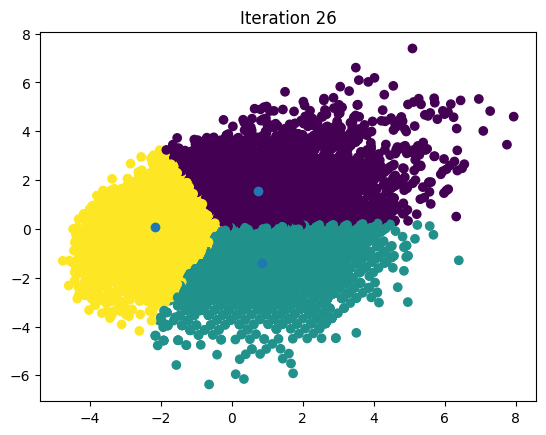

In [51]:
max_iterations=100
k=3
centroids=random_centroids(my_data, k)
old_centroids=pd.DataFrame()
iteration=1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids =centroids
    labels=get_labels(my_data, centroids)
    centroids=new_centroids(my_data, labels, k)
    plot_clusters(my_data, labels, centroids, iteration)
    iteration +=1
    
    

In [40]:
centroids

,0,1,2,3,4
overall,4.328121,5.305913,6.484409,4.011914,2.503032
potential,5.912348,4.950001,6.800155,4.016291,4.455514
wage_eur,1.074859,1.178221,1.688172,1.045248,1.015908
value_eur,1.063587,1.061776,1.457804,1.026961,1.013544
age,2.659796,5.931729,4.029306,4.487395,2.272253


In [50]:
df_players[labels ==3][["short_name"] + my_features]


,short_name,overall,potential,wage_eur,value_eur,age
5063,Vítor Angulho,70,70,6000.0,1300000.0,25
5065,Renatão Baumer,70,70,12000.0,1600000.0,25
5066,Carvamelinho,70,70,13000.0,1600000.0,25
5068,Claytinho Branco,70,70,13000.0,1600000.0,25
5070,Breno Bemposta,70,70,7000.0,1600000.0,25
...,...,...,...,...,...,...
19012,A. Paul,50,55,500.0,50000.0,26
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36
19118,Gao Xiang,49,49,2000.0,35000.0,32


In [52]:
#Compare this model performance with sklearn

from sklearn.cluster import KMeans


In [54]:
kmeans=KMeans(3)
kmeans.fit(my_data)




c:\New folder (2)\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [55]:
KMeans(n_clusters=3)


KMeans(n_clusters=3)

In [56]:
centroids=kmeans.cluster_centers_

pd.DataFrame(centroids, columns=my_features).T


,0,1,2
overall,6.231096,4.800991,3.599859
potential,6.623746,4.503972,5.205869
wage_eur,1.657093,1.112902,1.039947
value_eur,1.413686,1.040011,1.035792
age,4.139879,5.609167,2.712386
